In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [4]:
rating = pd.read_csv('jester-data-1.csv', header=None)
rating.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [5]:
rating = rating.replace(99, np.nan)

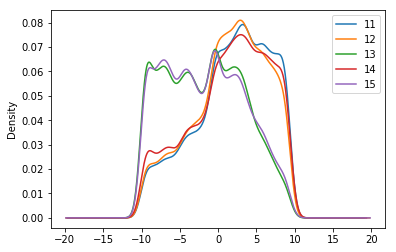

In [6]:
rating[[11, 12, 13, 14, 15]].plot(kind='kde')

In [7]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [66]:
# this is the size of our encoded representations
encoding_dim = 32

# this is our input placeholder
x = Input(shape=(100,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu', use_bias=False)(x)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(100, activation='sigmoid', use_bias=False)(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(x, decoded)

In [67]:
# this model maps an input to its encoded representation
encoder = Model(x, encoded)

In [68]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [69]:
autoencoder.compile(optimizer='adadelta', loss='mean_absolute_error')

In [70]:
without_counts = rating.as_matrix()[:, 1:]

In [71]:
# normalize between 0 and 1
normed_data = (without_counts + 10.01) / 20.01

In [72]:
normed_data = np.nan_to_num(normed_data)

In [73]:
np.random.shuffle(normed_data)
training, test = normed_data[:20000,:], normed_data[20000:,:]

In [74]:
from keras.callbacks import TensorBoard

In [75]:
from uuid import uuid1

autoencoder.fit(training, training,
                epochs=250,
                batch_size=256,
                validation_data=(test, test),
                callbacks=[TensorBoard(log_dir='tmp\\'+str(uuid1()))])

Train on 20000 samples, validate on 4983 samples
Epoch 1/250
20000/20000 [==============================] - 0s - loss: 0.2891 - val_loss: 0.2674
Epoch 2/250
20000/20000 [==============================] - 0s - loss: 0.2457 - val_loss: 0.2273
Epoch 3/250
20000/20000 [==============================] - 0s - loss: 0.2162 - val_loss: 0.2032
Epoch 4/250
20000/20000 [==============================] - 0s - loss: 0.1956 - val_loss: 0.1874
Epoch 5/250
20000/20000 [==============================] - 0s - loss: 0.1827 - val_loss: 0.1773
Epoch 6/250
20000/20000 [==============================] - 0s - loss: 0.1744 - val_loss: 0.1710
Epoch 7/250
20000/20000 [==============================] - 0s - loss: 0.1692 - val_loss: 0.1668
Epoch 8/250
20000/20000 [==============================] - 0s - loss: 0.1653 - val_loss: 0.1634
Epoch 9/250
20000/20000 [==============================] - 0s - loss: 0.1623 - val_loss: 0.1608
Epoch 10/250
20000/20000 [==============================] - 0s - loss: 0.1601 - val_los

In [76]:
autoencoder.layers[1].get_weights()

[array([[  1.48166984e-01,   6.52731434e-02,  -1.34111762e-01, ...,
          -1.96895391e-01,  -3.66800465e-03,   2.41286620e-01],
        [  2.29762331e-01,   9.56910178e-02,   2.69340854e-02, ...,
          -1.74957618e-01,   1.78157265e-04,   2.09563851e-01],
        [  5.19574694e-02,  -6.02040887e-02,  -1.61489666e-01, ...,
           1.68129653e-01,  -1.96760267e-01,   2.51087815e-01],
        ..., 
        [  1.91568658e-01,  -1.78624928e-01,   1.46782011e-01, ...,
           8.58601183e-03,  -6.62149712e-02,   6.14365973e-02],
        [  1.25427827e-01,  -1.28076419e-01,  -1.02975175e-01, ...,
           2.13832464e-02,  -6.43590465e-03,  -1.31641299e-01],
        [  9.79993269e-02,   1.41909063e-01,  -8.99013206e-02, ...,
           1.92373730e-02,  -1.31108791e-01,  -7.97202960e-02]], dtype=float32)]

In [77]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(test)
decoded_imgs = decoder.predict(encoded_imgs)

In [78]:
# get sparsity of hidden layer
encoded_imgs.mean()

1.980076

In [79]:
import matplotlib.pyplot as plt

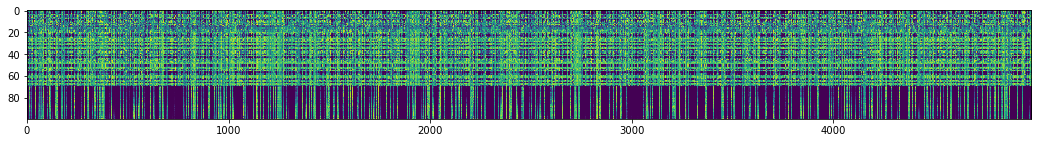

In [80]:
fig, ax = plt.subplots(figsize=(18, 2))
plt.imshow(decoded_imgs.transpose(), aspect='auto')

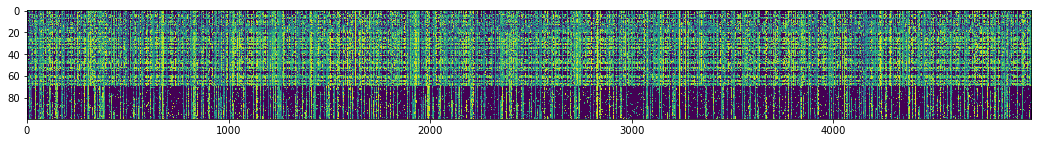

In [81]:
fig, ax = plt.subplots(figsize=(18, 2))
plt.imshow(test.transpose(), aspect='auto')

In [82]:
liked = np.round(decoded_imgs/0.25)
test_liked = np.round(test/0.25)

In [83]:
# Rough accuracy
sum(sum(liked == test_liked))/(liked.shape[0]*liked.shape[1])

0.60620108368452741

In [90]:
# Score error
sum(sum(abs(test_liked-liked))/(liked.shape[0]*liked.shape[1]))

0.47802729279550454